# CASP15 Assembly Category Analysis

In [2]:
# Load required kibraries
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import shutil
import os
import numpy as np
import csv
from scipy.stats import t
from scipy import stats

## Per-target distribution of ICS, TM, IPS, and lDDT metrics calculated over the submitted models (Figure 1):

<Figure size 720x432 with 0 Axes>

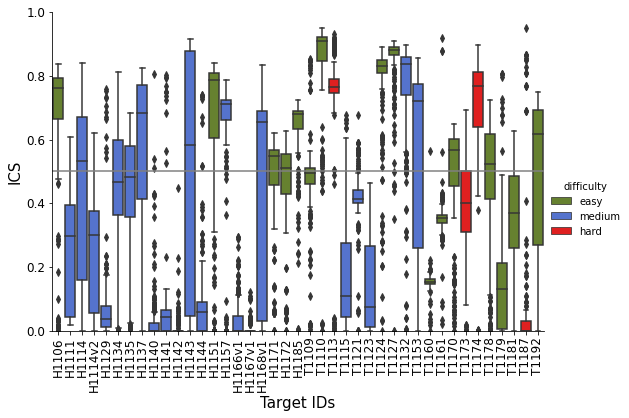

<Figure size 720x432 with 0 Axes>

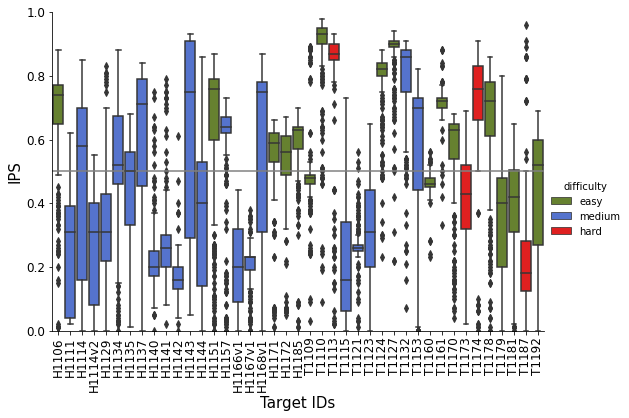

<Figure size 720x432 with 0 Axes>

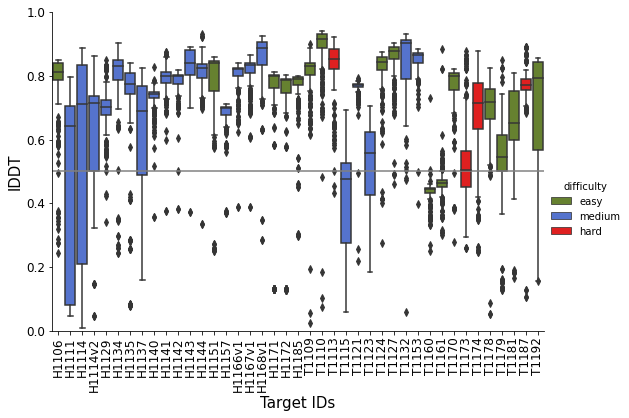

<Figure size 720x432 with 0 Axes>

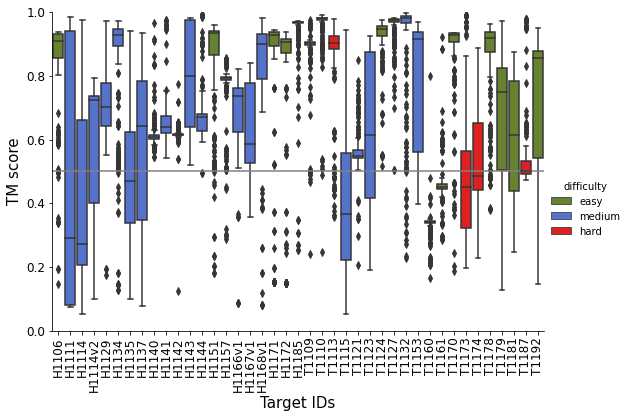

In [79]:

# Load data
df=pd.read_csv(r"../scorefiles/assembly/casp15_assembly_metric_scores_pertarget.txt", sep=" ")
df['F1']=df['F1']/100

# Box and whisker plot function for different metrics
def create_boxplot(df, y_var, hue_var, xlabel=None, ylabel=None, title=None, save_path=None):
    # Define a default color palette for difficulty classes
    palette = {"easy": "olivedrab", "medium": "royalblue", "hard": "red"}
    
    # Box and whisker plot of a metric for all submitted models per target
    plt.figure(figsize=(10, 6))
    sns.catplot(x="target_name", y=y_var, hue=hue_var,
                kind="box", data=df, palette=palette,
                dodge=False, aspect=1.5)
    locs, labels = plt.xticks()
    
    if xlabel:
        plt.xlabel(xlabel, fontsize=15)
    
    if ylabel:
        plt.ylabel(ylabel, fontsize=15)
    
    if title:
        plt.title(title, fontsize=15)
    
    plt.ylim(0, 1)
    plt.setp(labels, rotation=90, fontsize=12)
    ypoints = 0.5
    plt.axhline(ypoints, 0, 1, label='pyplot horizontal line', color='gray')
    
    # Save the plot if a save_path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()

# Example usage for ICS (F1) metric:
# !!!Please ensure the specified save path does not conflict with existing files in your directory, as it may overwrite them.
create_boxplot(df, y_var="F1", hue_var="difficulty", xlabel="Target IDs", ylabel="ICS",
               save_path="../outputfiles/assembly/casp15_assembly_ICS_scores_pertarget.png")


# Example usage for IPS (Jaccard Coefficient) metric:
# !!!Please ensure the specified save path does not conflict with existing files in your directory, as it may overwrite them.
create_boxplot(df, y_var="Jaccard", hue_var="difficulty", xlabel="Target IDs", ylabel="IPS",
              save_path="../outputfiles/assembly/casp15_assembly_IPS_scores_pertarget.png")

# Example usage for lDDT metric:
# !!!Please ensure the specified save path does not conflict with existing files in your directory, as it may overwrite them.
create_boxplot(df, y_var="lDDToligo", hue_var="difficulty", xlabel="Target IDs", ylabel="lDDT",
              save_path="../outputfiles/assembly/casp15_assembly_lDDT_scores_pertarget.png")

# Example usage for TM score metric:
# !!!Please ensure the specified save path does not conflict with existing files in your directory, as it may overwrite them.
create_boxplot(df, y_var="TMscore", hue_var="difficulty", xlabel="Target IDs", ylabel="TM score",
              save_path="../outputfiles/assembly/casp15_assembly_TM_scores_pertarget.png")



## Comparison of CASP Assembly Rounds - CASP12 to CASP15 (Figure 2):

### Stacked bar plot illustrating the distribution of the best models across three interface accuracy bins (poor: ICS<0.50, red; good: 0.50 ≤ ICS < 0.75, blue; and high: ICS ≥ 0.75, green)  (Figure 2A):

    Round  Poor(0.0-0.50)  Good(0.50-0.75)  High(0.75-1.00)
0  CASP12              70               23                7
1  CASP13              66               20               14
2  CASP14              69               24                7
3  CASP15               9               37               54


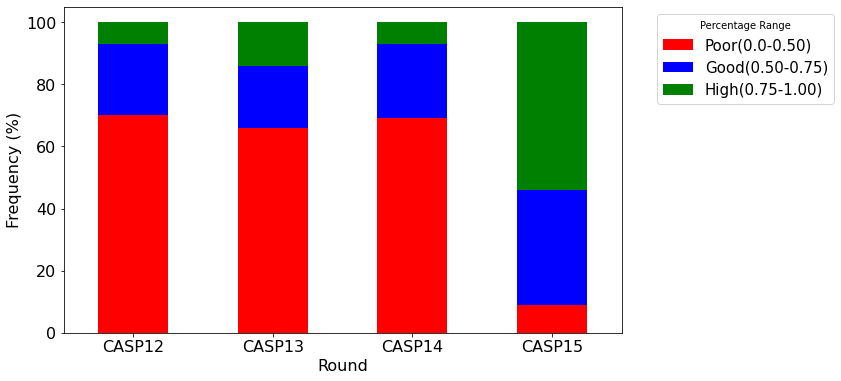

In [80]:
# Load data
df=pd.read_csv(r"../scorefiles/assembly/casp_assembly_all_rounds_best_f1_frequencies.txt", sep=" ")
print(df)

# Define a custom color palette for poor, good, and high accuracy ranges
custom_palette = {'Poor(0.0-0.50)': 'red', 'Good(0.50-0.75)': 'blue', 'High(0.75-1.00)': 'green'}

# Create a stacked bar plot
ax = df.set_index("Round").plot(kind="bar", stacked=True, figsize=(10, 6),
                                color=[custom_palette[col] for col in df.columns[1:]])
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel("Frequency (%)", fontsize=16)
plt.xlabel("Round", fontsize=16)

# Move the legend outside the plot
plt.legend(title="Percentage Range", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15)

# Save the plot to the specified file path
# !!!Please ensure the specified save path does not conflict with existing files in your directory, as it may overwrite them.
plt.savefig('../outputfiles/assembly/casp_assembly_rounds_f1_comparison_for_different_accuracy_zones_comparison.png',dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

### Box-and-whisker plots depicting the distribution of the best ICS scores generated in each round (Figure 2B):

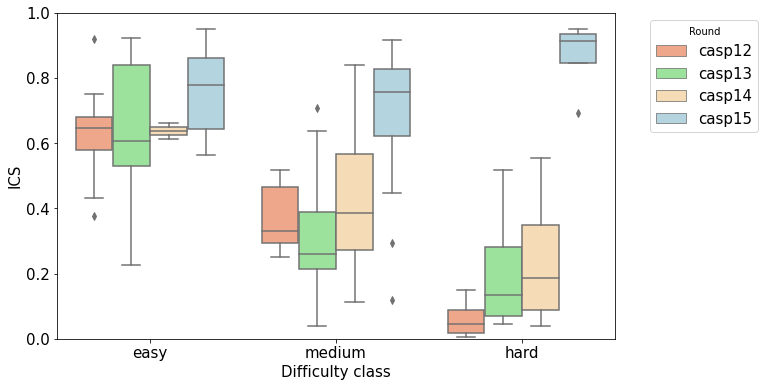

In [81]:
# Load F1 scores data for each round and convert to 0-1 range
df12_f1 = pd.read_csv(r"../scorefiles/assembly/casp12_assembly_f1_scores.txt", sep=" ")
df12_f1['F1'] = df12_f1['F1'] / 100

df13_f1 = pd.read_csv(r"../scorefiles/assembly/casp13_assembly_f1_scores.txt", sep=" ")
df13_f1['F1'] = df13_f1['F1'] / 100

df14_f1 = pd.read_csv(r"../scorefiles/assembly/casp14_assembly_f1_scores.txt", sep=" ")
df14_f1['F1'] = df14_f1['F1'] / 100

df15_f1 = pd.read_csv(r"../scorefiles/assembly/casp15_assembly_f1_scores.txt", sep=" ")
df15_f1['F1'] = df15_f1['F1'] / 100

# Concatenate data from all rounds into a single dataset
df = pd.concat([df12_f1, df13_f1, df14_f1, df15_f1])

# Generate a custom color palette for each round
custom_palette = {'casp12': 'lightsalmon', 'casp13': 'lightgreen', 'casp14': 'navajowhite', 'casp15': 'lightblue'}

# Plot box and whisker plots for each difficulty class
plt.figure(figsize=(10, 6))

sns.boxplot(x='difficulty', y='F1', data=df, hue='Round', palette=custom_palette)

locs, labels = plt.xticks()
locs, labels_y = plt.yticks(fontsize=15)  # Set the y-axis values font size to 15
plt.ylabel("ICS", fontsize=15)
plt.ylim(ymin=0, ymax=1)
plt.xlabel("Difficulty class", fontsize=15)
plt.setp(labels, fontsize=15)  # Adjust the x-axis labels' font size

# Move the legend outside the plot with font size 15
plt.legend(title="Round", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15)

# Save the plot to the specified file path
# !!!Please ensure the specified save path does not conflict with existing files in your directory, as it may overwrite them.
plt.savefig('../outputfiles/assembly/casp_assembly_rounds_f1_comparison_for_different_difficulty_classes.png',dpi=300, bbox_inches='tight')



plt.show()

## CASP15 assembly rankings and top performing groups:
### The CASP15 assembly groups' rankings (Figure 3A):

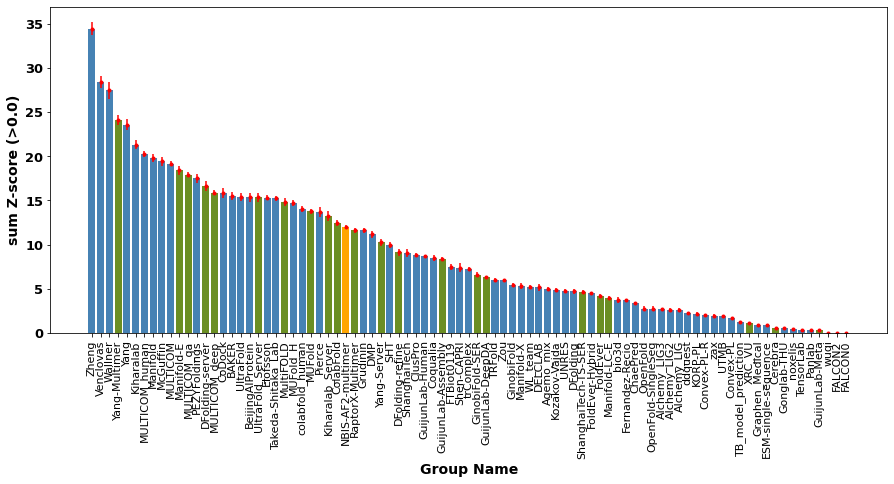

In [83]:
# Load data
df=pd.read_csv(r"../scorefiles/assembly/casp15_assembly_zscores_bootstrapped.txt", sep=" ")

# Define plot size
fig = plt.figure(figsize=(15,6))

# Define color mapping based on 'gr_type': 'server' as olivedrab, 'AF2M' as orange, and 'human' as steelblue
color_mapping = {
    'server': 'olivedrab',
    'AF2M': 'orange',
    'human': 'steelblue'
}

# Create a bar plot for 'mean' values with colors based on 'gr_type'
plt.bar(df['gr_name'], df['mean'], color=[color_mapping.get(gr_type, 'steelblue') for gr_type in df['gr_type']])

# Add error bars with red markers
plt.errorbar(df['gr_name'], df['mean'], yerr=df['std_dev'], fmt=".", color="r")

# Customize x-axis labels with rotation and fontsize
plt.xticks(rotation=90, fontsize=11)

# Customize y-axis labels with fontsize and bold fontweight
plt.yticks(fontsize=13, fontweight='bold')

# Add labels for x-axis and y-axis with fontsize and bold fontweight
plt.xlabel("Group Name", fontsize=14, fontweight='bold')
plt.ylabel("sum Z-score (>0.0)", fontsize=14, fontweight='bold')

# Save the plot to the specified file path
# !!!Please ensure the specified save path does not conflict with existing files in your directory, as it may overwrite them.
plt.savefig('../outputfiles/assembly/casp15_assembly_zscore_group_rankings.png',dpi=300, bbox_inches='tight')


plt.show()

### The CASP15 assembly groups’ average z-scores per target (Figure S3):

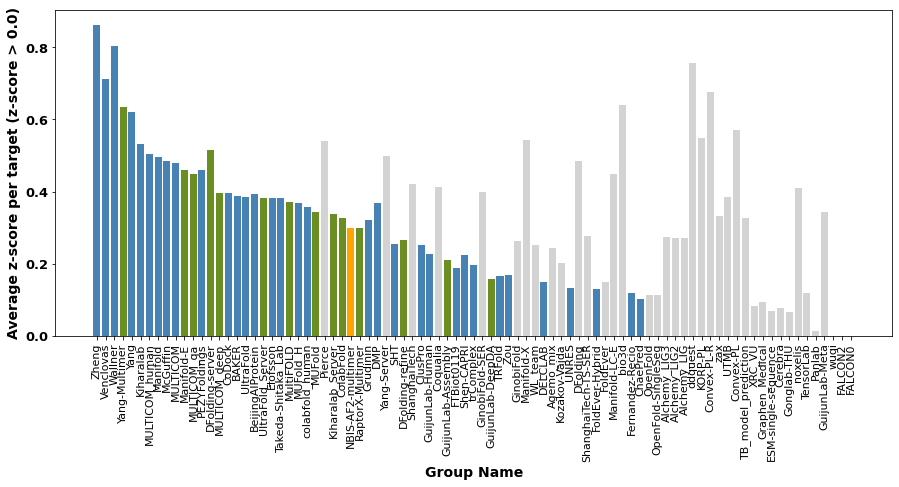

In [116]:
## Load Data
df=pd.read_csv(r"../scorefiles/assembly/casp15_assembly_zscores_bootstrapped.txt", sep=" ")

# Define a color palette based on gr_type and number_of_targets
color_palette = []

for _, row in df.iterrows():
    if row['gr_type'] == 'server' and row['number_of_targets'] > 30.75:
        color_palette.append('olivedrab')
    elif row['gr_type'] == 'human' and row['number_of_targets'] > 30.75:
        color_palette.append('steelblue')
    elif row['gr_type'] == 'AF2M' and row['number_of_targets'] > 30.75:
        color_palette.append('orange')
    else:
        color_palette.append('lightgray')

# Create a figure for the plot
plt.figure(figsize=(15, 6))

# Bar plot with the specified color palette
plt.bar(df['gr_name'], df['avg_zscore_pertarget'], color=color_palette)

# Customize x-axis labels with rotation and fontsize
plt.xticks(rotation=90, fontsize=11)

# Customize y-axis labels with fontsize and bold fontweight
plt.yticks(fontsize=13, fontweight='bold')

# Add labels for x-axis and y-axis with fontsize and bold fontweight
plt.xlabel("Group Name", fontsize=14, fontweight='bold')
plt.ylabel("Average z-score per target (z-score > 0.0)", fontsize=14, fontweight='bold')

# Save the plot to the specified file path
# !!!Please ensure the specified save path does not conflict with existing files in your directory, as it may overwrite them.
plt.savefig('../outputfiles/assembly/casp15_assembly_average_zscore_per_target_group_rankings.png',dpi=300, bbox_inches='tight')


# Show the plot
plt.show()

### Model ranking efficiency of the top performing groups, i.e., Zheng, Venclovas, Wallner (Figure 3B):

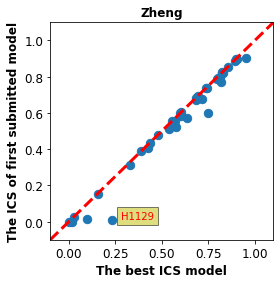

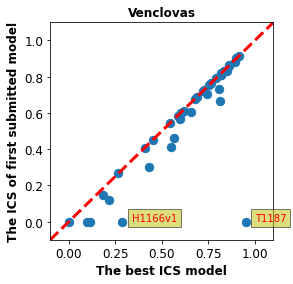

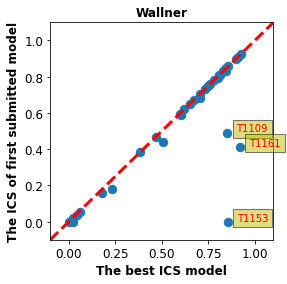

In [84]:
# Load data for Zheng group and adjust columns
df_374=pd.read_csv(r"../scorefiles/assembly/casp15_assembly_Zheng_first_vs_bestF1.txt", sep=" ")
df_374['best_F1']=df_374['best_F1']/100
df_374['first_F1']=df_374['first_F1']/100

# Load data for Venclocas group and adjust columns
df_494=pd.read_csv(r"../scorefiles/assembly/casp15_assembly_Venclovas_first_vs_bestF1.txt", sep=" ")
df_494['best_F1']=df_494['best_F1']/100
df_494['first_F1']=df_494['first_F1']/100

# Load data for Wallner and adjust columns
df_037=pd.read_csv(r"../scorefiles/assembly/casp15_assembly_Wallner_first_vs_bestF1.txt", sep=" ")
df_037['best_F1']=df_037['best_F1']/100
df_037['first_F1']=df_037['first_F1']/100


def create_scatter_plot(df, x_column, y_column, title=None, save_path=None):

    # Create a figure with a specific size
    plt.figure(figsize=(4, 4))
    
    # Scatter plot
    plt.scatter(df[x_column], df[y_column], s=70)
    
    # Keep x and y-axis labels as they are
    plt.xlabel('The best ICS model', fontsize=12, fontweight='bold')
    plt.ylabel('The ICS of first submitted model', fontsize=12, fontweight='bold')
    
    # Customize tick labels and limits
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(ymax=1.1, ymin=-0.1)
    plt.xlim(xmax=1.1, xmin=-0.1)
    
    # Set the plot title
    plt.title(title, fontsize=12, fontweight='bold')

    # Annotate points with a significant difference
    for i in range(df.shape[0]):
        if df[x_column][i] - df[y_column][i] > 0.2:
            plt.text(x=df[x_column][i] + 0.05, y=df[y_column][i] + 0.005, s=df['target_name'][i],
                     fontdict=dict(color='r', size=10),
                     bbox=dict(facecolor='y', alpha=0.5))

    # Add a diagonal reference line
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=3, scalex=False, scaley=False)

    # Save the plot if a save path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    # Display the plot
    plt.show()
    

# Example usage for Zheng group:
# !!!Please ensure the specified save path does not conflict with existing files in your directory, as it may overwrite them.
create_scatter_plot(df_374, x_column='best_F1', y_column='first_F1', title='Zheng', 
                    save_path='../outputfiles/assembly/casp15_assembly_Zheng_model_ranking_efficiency.png')

# Example usage for Venclovas group:
# !!!Please ensure the specified save path does not conflict with existing files in your directory, as it may overwrite them.
create_scatter_plot(df_494, x_column='best_F1', y_column='first_F1', title='Venclovas', 
                    save_path='../outputfiles/assembly/casp15_assembly_Venclovas_model_ranking_efficiency.png')

# Example usage for Wallner:
# !!!Please ensure the specified save path does not conflict with existing files in your directory, as it may overwrite them.
create_scatter_plot(df_037, x_column='best_F1', y_column='first_F1', title='Wallner', 
                    save_path='../outputfiles/assembly/casp15_assembly_Wallner_model_ranking_efficiency.png')

### Model similarities between the top-ranking groups (i.e., Zheng, Venclovas, Wallner, Yang and Yang-Multimer) and the baseline predictor AF2M (Figure S4):

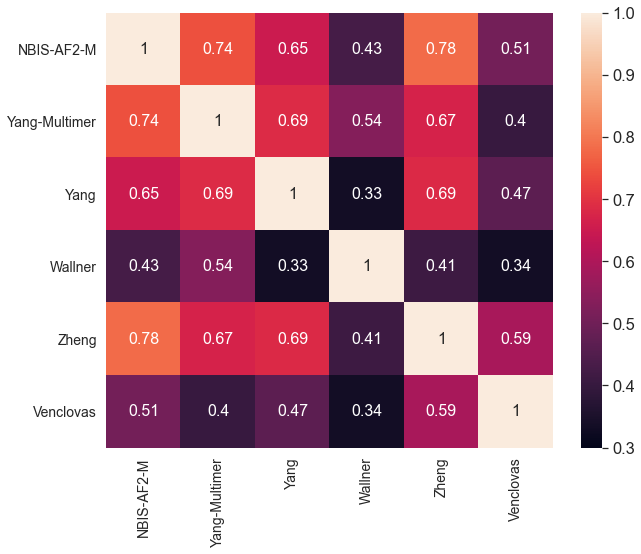

In [126]:
# Load data
df = pd.read_csv("../scorefiles/assembly/casp15_assembly_top5_and_NBIS_F1_scores.txt", sep=" ")


# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 8))

# Generate the heatmap
heatmap = sns.heatmap(df.corr(), linecolor='black', vmin=0.3, vmax=1, annot=True, annot_kws={"size": 16})

# Customize font size for the heatmap
sns.set(font_scale=1.5)

# Customize tick label font size for both x and y axes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# Save the plot
# !!!Please ensure the specified save path does not conflict with existing files in your directory, as it may overwrite them.
plt.savefig('../outputfiles/assembly/casp15_assembly_top5groups_and_AF2M_correlation_based_on_all_f1.png', dpi=300, bbox_inches='tight')

# Show the heatmap
plt.show()

### The ICS relationship between the best models submitted by Wallner and Zheng (Figure S10):

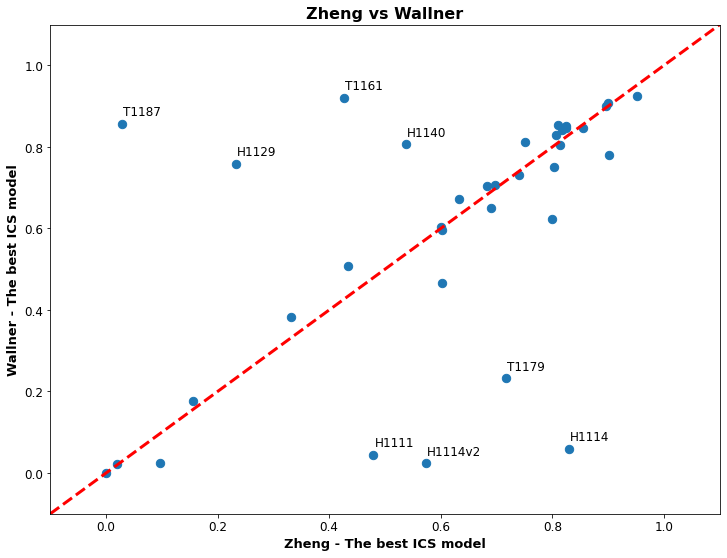

In [14]:
# Load data
df = pd.read_csv(r"../scorefiles/assembly/casp15_assembly_top3_groups_best_f1.txt", sep=" ")
df['Zheng_best_F1'] = df['Zheng_best_F1'] / 100
df['Wallner_best_F1'] = df['Wallner_best_F1'] / 100

# Create a scatter plot
plt.figure(figsize=(12, 9))
plt.scatter(df['Zheng_best_F1'], df['Wallner_best_F1'], s=70)

# Set x-axis and y-axis labels with fontsize and fontweight
plt.xlabel('Zheng - The best ICS model', fontsize=13, fontweight='bold')
plt.ylabel('Wallner - The best ICS model', fontsize=13, fontweight='bold')

# Set font sizes for tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set y-axis and x-axis limits
plt.ylim(ymax=1.1, ymin=-0.1)
plt.xlim(xmax=1.1, xmin=-0.1)

# Add a title with fontsize and fontweight
plt.title("Zheng vs Wallner", fontsize=16, fontweight='bold')

# Annotate points where the difference is greater than 0.25
for i in range(df.shape[0]):
    if df.Zheng_best_F1[i] - df.Wallner_best_F1[i] > 0.25:
        plt.text(y=df.Wallner_best_F1[i] + 0.02, x=df.Zheng_best_F1[i] + 0.002, s=df.target_name[i],
                 fontdict=dict(color='k', size=12))

for i in range(df.shape[0]):
    if df.Wallner_best_F1[i] - df.Zheng_best_F1[i] > 0.25:
        plt.text(y=df.Wallner_best_F1[i] + 0.02, x=df.Zheng_best_F1[i] + 0.002, s=df.target_name[i],
                 fontdict=dict(color='k', size=12))

# Add a diagonal dashed line in red
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=3, scalex=False, scaley=False)

# Save the plot to the specified file path
# !!!Please ensure the specified save path does not conflict with existing files in your directory, as it may overwrite them.
plt.savefig('../outputfiles/assembly/casp15_assembly_ZhengsvsWallner_best_f1_comparison.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

## Exploring the relationship between MSA size (Neff) and model accuracy (ICS scores)

### Scatter plot and regression analysis for Neff vs. ICS scores, categorized by difficulty classes (Figure 4A):

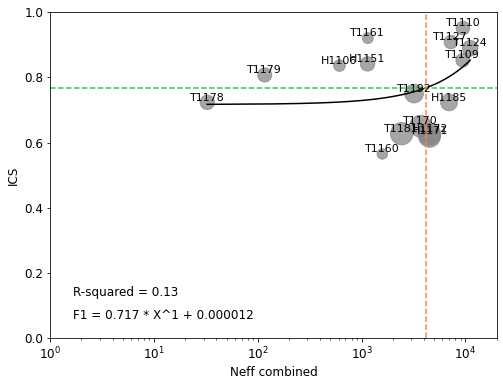

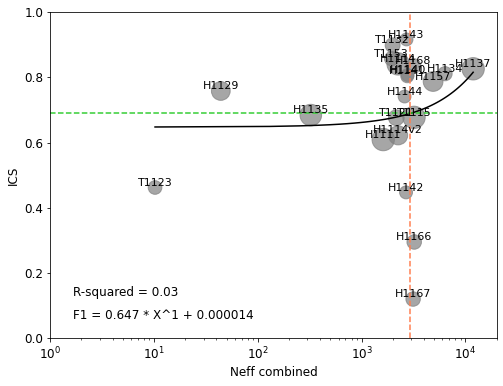

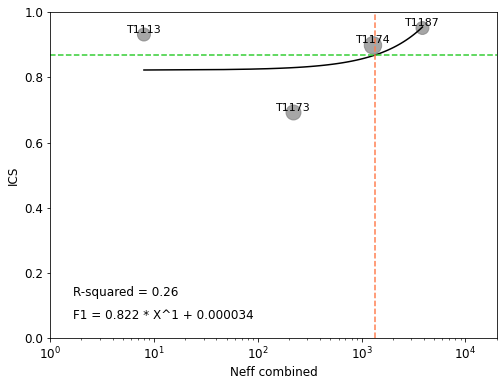

In [85]:
# Load Data
df=pd.read_csv(r"../scorefiles/assembly/casp15_assembly_Neff_classification.txt", sep=" ")
df['F1']=df['F1']/100

# Generate new datasets for each difficulty class: easy, medium, and hard
df_easy = df[df['difficulty'] == 'easy'].reset_index(drop=True).copy()
df_medium = df[df['difficulty'] == 'medium'].reset_index(drop=True).copy()
df_hard = df[df['difficulty'] == 'hard'].reset_index(drop=True).copy()


# Function for creating a scatter plot of ICS vs Neff data with a regression line
def format_equation(coeffs):

    equation = 'F1 = '
    n = len(coeffs) - 1

    for i, coeff in enumerate(coeffs[::-1]):
        if i < n:
            equation += f'{coeff:.3f} * X^{n-i} + '
        else:
            equation += f'{coeff:.6f}'

    return equation

def create_lmplot_poly(df, line_color='limegreen', line_order=2, confidence=0.95, save_path=None):

    
    # Scale the point size based on the assembly length (aa_size)
    # Define the minimum (min_size) and maximum (max_size) values for scaling
    # Map the aa_size values to point sizes between 100 and 500 using linear interpolation
    min_size = 0
    max_size = 2000
    scaled_sizes = np.interp(df['aa_size'], (min_size, max_size), (100, 500))

    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    g = sns.scatterplot(x="Neff_comb", y="F1", data=df, legend=False, alpha=0.7, color="gray", s=scaled_sizes, edgecolor=None)
    ax = g.axes
    plt.xscale("log")

    # Annotate points with target IDs
    for i, txt in enumerate(df['target_name']):
        ax.annotate(txt, (df['Neff_comb'].iloc[i], df['F1'].iloc[i]), fontsize=11, ha='center', va='bottom', color='black')

    # Fit a polynomial regression line
    coeffs = np.polyfit(df['Neff_comb'], df['F1'], line_order)
    x_vals = np.linspace(df['Neff_comb'].min(), df['Neff_comb'].max(), 100)
    y_vals = np.polyval(coeffs, x_vals)
    ax.plot(x_vals, y_vals, color=line_color)

    # Calculate R-squared value
    residuals = df['F1'] - np.polyval(coeffs, df['Neff_comb'])
    ss_residuals = np.sum(residuals ** 2)
    ss_total = np.sum((df['F1'] - np.mean(df['F1'])) ** 2)
    r_squared = 1 - (ss_residuals / ss_total)

    # Add mean values
    ypoints = df["F1"].mean()
    plt.axhline(ypoints, 0, 1, label='Mean F1', color='limegreen', linestyle='--')
    xpoints = df["Neff_comb"].mean()
    plt.axvline(xpoints, 0, 1, label='Mean Neff_comb', color='coral', linestyle='--')

    # Add R-squared and fitted equation to the plot
    equation = format_equation(coeffs)
    r_squared_text = f'R-squared = {r_squared:.2f}'
    ax.text(0.05, 0.05, equation, transform=ax.transAxes, fontsize=12, verticalalignment='bottom')
    ax.text(0.05, 0.12, r_squared_text, transform=ax.transAxes, fontsize=12, verticalalignment='bottom')

    # Set x-axis and y-axis limits
    ax.set_xlim(1, 20000)
    ax.set_ylim(0, 1)
    
    # Set font size for x-axis and y-axis labels
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel("Neff combined", fontsize=12)
    plt.ylabel("ICS", fontsize=12)

    # Save the plot if a save path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    # Display the plot
    plt.show()

# Example usage for easy cases:
# !!!Please ensure the specified save path does not conflict with existing files in your directory, as it may overwrite them.
create_lmplot_poly(df_easy, line_color='black', line_order=1, confidence=0.95, save_path='../outputfiles/assembly/casp15_assembly_neff_vs_f1_easy.png')

# Example usage for medium cases:
# !!!Please ensure the specified save path does not conflict with existing files in your directory, as it may overwrite them.
create_lmplot_poly(df_medium, line_color='black', line_order=1, confidence=0.95, save_path='../outputfiles/assembly/casp15_assembly_neff_vs_f1_medium.png')

# Example usage for hard cases:
# !!!Please ensure the specified save path does not conflict with existing files in your directory, as it may overwrite them.
create_lmplot_poly(df_hard, line_color='black', line_order=1, confidence=0.95, save_path='../outputfiles/assembly/casp15_assembly_neff_vs_f1_hard.png')



### Relationship between baseline multimeric Neff values and the best ICS values for each difficulty category with regression lines and 95% confidence intervals (Figure S5):

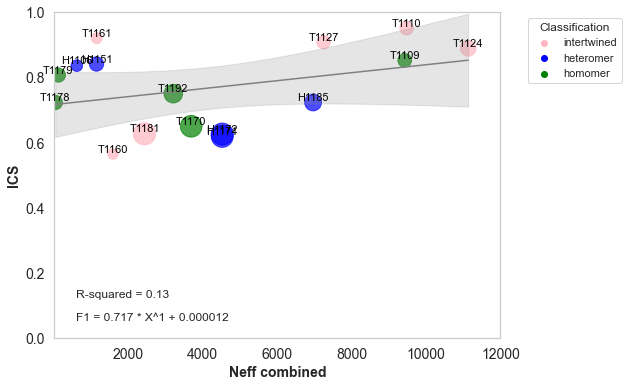

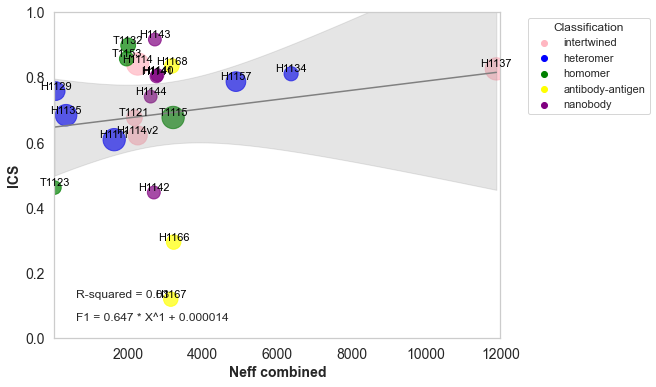

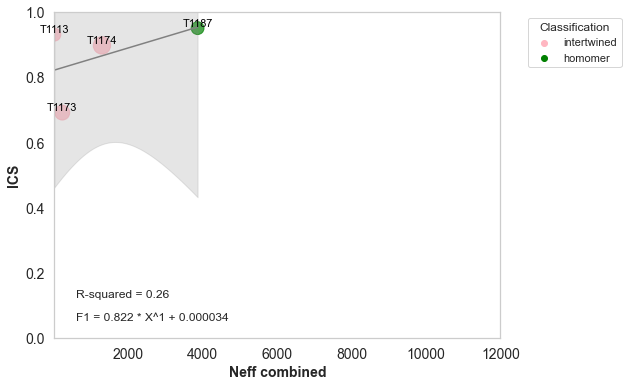

In [159]:
# Load Data
df=pd.read_csv(r"../scorefiles/assembly/casp15_assembly_Neff_classification.txt", sep=" ")
df['F1']=df['F1']/100

# Generate new datasets for each difficulty class: easy, medium, and hard
df_easy = df[df['difficulty'] == 'easy'].reset_index(drop=True).copy()
df_medium = df[df['difficulty'] == 'medium'].reset_index(drop=True).copy()
df_hard = df[df['difficulty'] == 'hard'].reset_index(drop=True).copy()

# Function for creating a scatter plot of ICS vs Neff data with a regression line
def format_equation(coeffs):
    equation = 'F1 = '
    n = len(coeffs) - 1

    for i, coeff in enumerate(coeffs[::-1]):
        if i < n:
            equation += f'{coeff:.3f} * X^{n-i} + '
        else:
            equation += f'{coeff:.6f}'

    return equation

def create_lmplot_poly(df, line_order=1, confidence=0.95, save_path=None):
    
    # Set Seaborn style to white background without gridlines
    sns.set_style("whitegrid", {"axes.grid": False})

    # Define a color palette based on the classification column
    color_dict = {
        'homomer': 'green',
        'heteromer': 'blue',
        'intertwined': 'lightpink',
        'antibody-antigen': 'yellow',
        'nanobody': 'purple'
    }

    # Scale the point size based on the assembly length (aa_size)
    min_size = 0
    max_size = 2000
    scaled_sizes = np.interp(df['aa_size'], (min_size, max_size), (100, 500))

    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    g = sns.scatterplot(x="Neff_comb", y="F1", hue="classification", data=df, alpha=0.7, palette=color_dict, s=scaled_sizes, edgecolor=None)
    ax = g.axes

    # Annotate points with target IDs
    for i, txt in enumerate(df['target_name']):
        ax.annotate(txt, (df['Neff_comb'].iloc[i], df['F1'].iloc[i]), fontsize=11, ha='center', va='bottom', color='black')

    # Fit a polynomial regression line
    coeffs = np.polyfit(df['Neff_comb'], df['F1'], line_order)
    x_vals = np.linspace(df['Neff_comb'].min(), df['Neff_comb'].max(), 100)
    y_vals = np.polyval(coeffs, x_vals)
    ax.plot(x_vals, y_vals, color="grey")

    # Calculate R-squared value
    residuals = df['F1'] - np.polyval(coeffs, df['Neff_comb'])
    ss_residuals = np.sum(residuals ** 2)
    ss_total = np.sum((df['F1'] - np.mean(df['F1'])) ** 2)
    r_squared = 1 - (ss_residuals / ss_total)

    # Calculate confidence interval
    n = len(df['Neff_comb'])
    dof = n - line_order - 1
    t_val = abs(t.ppf((1 - confidence) / 2, dof))
    y_err = t_val * np.sqrt((np.sum(residuals ** 2) / dof) * (1 / n + (x_vals - np.mean(df['Neff_comb'])) ** 2 / np.sum((df['Neff_comb'] - np.mean(df['Neff_comb'])) ** 2)))

    # Plot 95% confidence interval (uncomment these lines)
    ax.fill_between(x_vals, y_vals - y_err, y_vals + y_err, color='gray', alpha=0.2)

    # Add R-squared and fitted equation to the plot
    equation = format_equation(coeffs)
    r_squared_text = f'R-squared = {r_squared:.2f}'
    ax.text(0.05, 0.05, equation, transform=ax.transAxes, fontsize=12, verticalalignment='bottom')
    ax.text(0.05, 0.12, r_squared_text, transform=ax.transAxes, fontsize=12, verticalalignment='bottom')

    # Set x-axis and y-axis limits
    ax.set_xlim(1, 12000)
    ax.set_ylim(0, 1)

    # Set font size and font weight for x-axis and y-axis labels
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("Neff combined", fontsize=14, fontweight="bold")
    plt.ylabel("ICS", fontsize=14, fontweight="bold")

    # Add a legend outside the plot on the left side
    plt.legend(title="Classification", bbox_to_anchor=(1.05, 1), loc='upper left')

    # Save the plot if a save path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    # Display the plot
    plt.show()


# Example usage for easy cases:
# !!!Please ensure the specified save path does not conflict with existing files in your directory, as it may overwrite them.
create_lmplot_poly(df_easy, line_order=1, confidence=0.95, save_path='../outputfiles/assembly/casp15_assembly_neff_vs_f1_easy_acc_classification.png')

# Example usage for easy cases:
# !!!Please ensure the specified save path does not conflict with existing files in your directory, as it may overwrite them.
create_lmplot_poly(df_medium, line_order=1, confidence=0.95, save_path='../outputfiles/assembly/casp15_assembly_neff_vs_f1_medium_acc_classification.png')

# Example usage for easy cases:
# !!!Please ensure the specified save path does not conflict with existing files in your directory, as it may overwrite them.
create_lmplot_poly(df_hard, line_order=1, confidence=0.95, save_path='../outputfiles/assembly/casp15_assembly_neff_vs_f1_hard_acc_classification.png')

## The best ICS model submitted by the community vs. the best ICS model submitted by AF2M (Figure 5A):

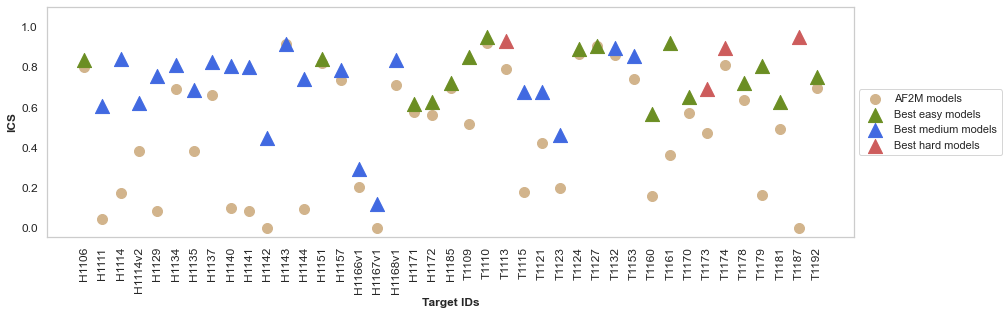

In [165]:
# Load data files
df_bestF1=pd.read_csv(r"../scorefiles/assembly/casp15_assembly_scores_acc_best_f1_models.txt", sep=" ")
df_bestF1['F1']=df_bestF1['F1']/100

df_AF2M=pd.read_csv(r"../scorefiles/assembly/casp15_assembly_scores_acc_best_f1_AF2M_models.txt", sep=" ")
df_AF2M['F1']=df_AF2M['F1']/100

# Create a figure for the plot
plt.figure(figsize=(14, 4))

# Plot AF2M models with dots and no lines
plt.scatter(df_AF2M['target_name'], df_AF2M['F1'], color='tan', marker='o', s=100, label='AF2M models')

# Define a color palette for difficulty classes
color_dict = {'easy': 'olivedrab', 'medium': 'royalblue', 'hard': 'indianred'}

# Scatter plot for bestF1 models with different difficulty classes and no lines
for difficulty in df_bestF1['difficulty'].unique():
    subset = df_bestF1[df_bestF1['difficulty'] == difficulty]
    plt.scatter(subset['target_name'], subset['F1'], color=color_dict.get(difficulty, 'gray'), marker='^', s=200, label=f'Best {difficulty} models')

# Add a legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set y-axis limit
plt.ylim(ymax=1.1)

# Set labels and tick font sizes
plt.xlabel('Target IDs', fontsize=12, fontweight='bold')
plt.ylabel('ICS', fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

# Adjust subplot parameters
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.5)

# Save the plot
# !!!Please ensure the specified save path does not conflict with existing files in your directory, as it may overwrite them.
plt.savefig("../outputfiles/assembly/casp15_assembly_best_f1_AF2M_vs_best_f1_model_comparison.png", dpi=300, bbox_inches='tight')


plt.show()

## The pairwise correlation of CASP15 metrics (ICS, IPS, lDDT, TM) by using all groups’ best models (Figure S12):

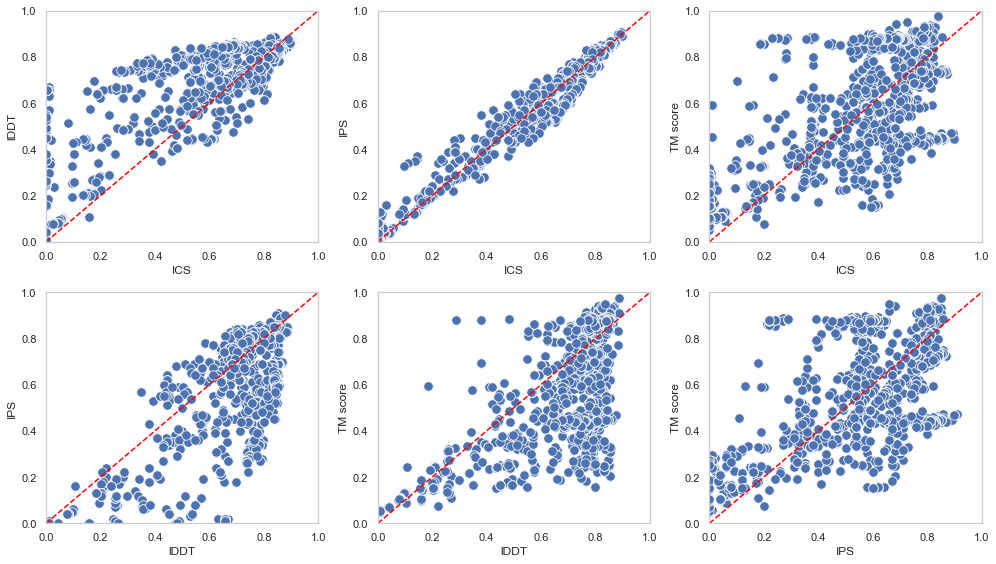

In [166]:
# Load the data
df = pd.read_csv(r"../scorefiles/assembly/casp15_assembly_all_groups_best_f1_models.txt", sep=" ")
df['F1'] = df['F1'] / 100

# Create a figure to contain multiple subplots
fig = plt.figure(figsize=(14, 8))

# Plot 1: ICS vs lDDT
plt.subplot(2, 3, 1)
sns.scatterplot(x="F1", y="lDDToligo", data=df, s=90)
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('ICS')
plt.ylabel('lDDT')
plt.ylim(ymax=1, ymin=0)
plt.xlim(xmax=1, xmin=0)

# Plot 2: ICS vs IPS
plt.subplot(2, 3, 2)
sns.scatterplot(x="F1", y="Jaccard", data=df, s=90)
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('ICS')
plt.ylabel('IPS')
plt.ylim(ymax=1, ymin=0)
plt.xlim(xmax=1, xmin=0)

# Plot 3: ICS vs TM score
plt.subplot(2, 3, 3)
sns.scatterplot(x="F1", y="TMscore", data=df, s=90)
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('ICS')
plt.ylabel('TM score')
plt.ylim(ymax=1, ymin=0)
plt.xlim(xmax=1, xmin=0)

# Plot 4: lDDT vs IPS
plt.subplot(2, 3, 4)
sns.scatterplot(x="lDDToligo", y="Jaccard", data=df, s=90)
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('lDDT')
plt.ylabel('IPS')
plt.ylim(ymax=1, ymin=0)
plt.xlim(xmax=1, xmin=0)

# Plot 5: lDDT vs TM score
plt.subplot(2, 3, 5)
sns.scatterplot(x="lDDToligo", y="TMscore", data=df, s=90)
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('lDDT')
plt.ylabel('TM score')
plt.ylim(ymax=1, ymin=0)
plt.xlim(xmax=1, xmin=0)

# Plot 6: IPS vs TM score
plt.subplot(2, 3, 6)
sns.scatterplot(x="Jaccard", y="TMscore", data=df, s=90)
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('IPS')
plt.ylabel('TM score')
plt.ylim(ymax=1, ymin=0)
plt.xlim(xmax=1, xmin=0)

# Adjust spacing between subplots
plt.tight_layout()


# Save the plot
# !!!Please ensure the specified save path does not conflict with existing files in your directory, as it may overwrite them.
plt.savefig("../outputfiles/assembly/casp15_assembly_metrics_correlations_acc_groups_best_f1_models.png", dpi=300, bbox_inches='tight')

# Display the plots
plt.show()

## Scatter plot showing the relationship between the resolution of the ground truth structure and the best ICS model generated for that target (Figure S13):

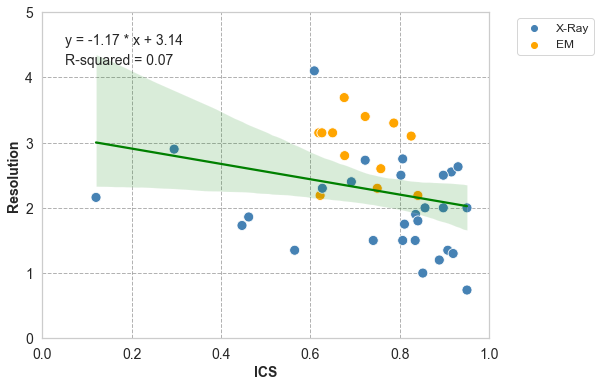

In [185]:
df=pd.read_csv(r"../scorefiles/assembly/casp15_assembly_irmsd_vs_best_f1_models.txt", sep=" ")
df['F1']=df['F1']/100

# Define a color palette based on the Experiment_Type
color_dict = {
    'EM': 'orange',
    'X-Ray': 'steelblue'
}

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x="F1", y="Resolution", hue="Technique", data=df, palette=color_dict, s=100)

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(df['F1'], df['Resolution'])
x_vals = np.linspace(0, 1, 100)  # Set x-axis range to 0-1
y_vals = slope * x_vals + intercept

# Plot the regression line in green with gray grid lines
sns.regplot(x="F1", y="Resolution", data=df, scatter=False, color='green', ci=95)
plt.grid(True, linestyle='--', color='gray', alpha=0.6)  # Add gray grid lines

# Set axis labels
plt.xlabel('ICS', fontsize=14, fontweight="bold")
plt.ylabel('Resolution', fontsize=14, fontweight="bold")

# Set y-axis and x-axis ranges
plt.ylim(ymin=0, ymax=5)
plt.xlim(xmin=0, xmax=1)

# Set font size for axis values
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Move the legend outside the box
plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

# Add R-squared value and equation to the plot
equation_text = f'y = {slope:.2f} * x + {intercept:.2f}'
rsquared_text = f'R-squared = {r_value**2:.2f}'
plt.text(0.05, 4.5, equation_text, fontsize=14)
plt.text(0.05, 4.2, rsquared_text, fontsize=14)

# Save the plot
# !!!Please ensure the specified save path does not conflict with existing files in your directory, as it may overwrite them.
plt.savefig("../outputfiles/assembly/casp15_assembly_resolution_vs_best_f1.png", dpi=300, bbox_inches='tight')


# Show the plot
plt.show()
